In [ ]:
# Run the following cells only if you want to run this on Google Colab
# Install Colab Anaconda (approx. 20 seconds)
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
# Mounting Google Drive 
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Change the current working directory to the mounted Google Drive
cd /content/drive/MyDrive/Colab Notebooks/KHU_Urban_Geography

# Urban Hierarchies of the United States using population and Gross Domestic Product (GDP) data

This Jupyter notebook analyzes the urban hierarchy of the United States using population and Gross Domestic Income (GDP) data. For the analysis, this notebook utilizes varous Python packages: Pandas (https://pandas.pydata.org/), GeoPandas (https://geopandas.org/en/stable/#), Matplotlib (https://matplotlib.org/) and Scipy (https://scipy.org/). 

### Data: 
- County Geometry: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html 
- County-level Population (American Community Survey): https://www.census.gov/programs-surveys/acs/data.html 
- County-level GDP (Bureau of Economic Analysis): https://www.bea.gov/data/gdp/gdp-county-metro-and-other-areas

### Steps: 
1. Read the shapefile using GeoPandas (County Geometry) <br>
2. Selecting rows (records) based on a condition <br>
3. Load Excel File with Pandas (GDP data) <br>
4. Join (Merge) county geometry and GDP data <br>
5. Make a choropleth map of GDP data <br>
6. Correlation Analysis between Population and GDP <br>

# Import Packages
A Python package is a way of organizing related Python modules into a single directory hierarchy. It provides a mechanism for grouping Python code files, resources, and configuration settings in a structured manner, making it easier to manage and distribute code. They also facilitate code reuse and distribution by allowing developers to bundle related functionality together and share it with others.

We will be using the following packages in this notebook: <br>
`pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. <br>
source: https://pandas.pydata.org/docs/getting_started/overview.html

`geopandas` is the geographic expansion of `pandas`, allowing to have geometry and working with vector data. <br>
source: https://geopandas.org/en/stable/getting_started/introduction.html

`matplotlib` provides a collection of functions that make plots and maps. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. <br>
source: https://matplotlib.org/stable/users/getting_started/

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/pz/gjtw38596y3_mm15469h9jy40000gn/T/ipykernel_99013/3771535966.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopanda

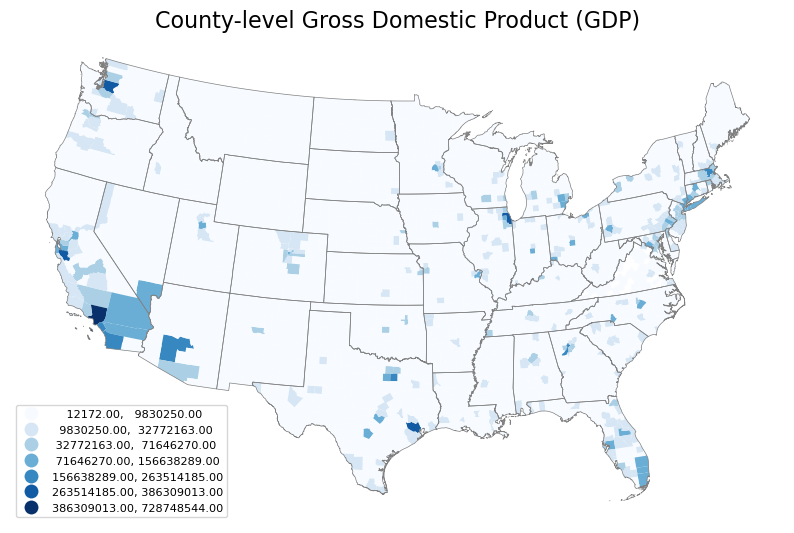

In [2]:
# Load County Shapefile
county_gdf = gpd.read_file('./data/county_cleaned.shp')

# Load GDP Data
gdp_df = pd.read_excel('./data/GDP_data_cleaned.xlsx', dtype={'GEOID': str})

# Merge (Join) GDP Data with County Shapefile
gdp_gdf = county_gdf.merge(gdp_df, on='GEOID', how='left')

# Visualize GDP Data
# Create an empty figure and axis (canvas)
fig, ax = plt.subplots(1, 1, figsize=(10,10))  

gdp_gdf.plot(column='GDP',            # Column to visualize
             cmap='Blues',            # Color map
             scheme='NaturalBreaks',  # Classification scheme
             legend=True,             # Show legend
             legend_kwds={'loc': 'lower left', 'fontsize': 8.1}, # Legend settings
             k=7,                     # Number of classes
             ax=ax                    # Axis to plot on
             )

# Load state shapefile (Plotting purposes)
state_gdf = gpd.read_file('./data/states.shp') 

# Add state boundaries
state_gdf.boundary.plot(ax=ax, color='grey', linewidth=0.5) 

# Set title
ax.set_title('County-level Gross Domestic Product (GDP)', fontsize=16) 

# Remove axis
ax.axis('off') 

plt.show() # Show the plot


# 1. Read the shapefile using GeoPandas (County Geometry)

In [3]:
# .read_file() method is used to read various spatial data formats (shapefile, GeoJSON, etc.)
county_gdf = gpd.read_file('./data/county_cleaned.shp')
county_gdf

,GEOID,StateCode,StateName,CountyName,geometry
0,01001,01,Alabama,Autauga County,"POLYGON ((891242.238 1081781.177, 891086.081 1..."
1,01003,01,Alabama,Baldwin County,"POLYGON ((773834.264 831250.746, 775614.661 83..."
2,01005,01,Alabama,Barbour County,"POLYGON ((967406.473 1001654.573, 967558.617 1..."
3,01007,01,Alabama,Bibb County,"POLYGON ((845975.782 1144275.950, 845993.624 1..."
4,01009,01,Alabama,Blount County,"POLYGON ((864758.270 1235754.115, 865138.916 1..."
...,...,...,...,...,...
3103,56037,56,Wyoming,Sweetwater County,"POLYGON ((-1160363.896 2136962.350, -1158425.9..."
3104,56039,56,Wyoming,Teton County,"POLYGON ((-1204078.039 2387199.590, -1203753.1..."
3105,56041,56,Wyoming,Uinta County,"POLYGON ((-1202237.750 2156253.483, -1201901.9..."
3106,56043,56,Wyoming,Washakie County,"POLYGON ((-997597.361 2419071.771, -994119.472..."


In [4]:
# Cheking the data types of the columns (object = string, int64 = integer, float64 = float)
county_gdf.dtypes

GEOID           object
StateCode       object
StateName       object
CountyName      object
geometry      geometry
dtype: object

In [5]:
# When you import a spatial data, the type of the object is a GeoDataFrame
type(county_gdf)

geopandas.geodataframe.GeoDataFrame

In [6]:
# Checking the columns of the GeoDataFrame
county_gdf.columns

Index(['GEOID', 'StateCode', 'StateName', 'CountyName', 'geometry'], dtype='object')

In [7]:
# Checking the contents of a column (e.g., GEOID) in the GeoDataFrame
county_gdf['GEOID']

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3103    56037
3104    56039
3105    56041
3106    56043
3107    56045
Name: GEOID, Length: 3108, dtype: object

<Axes: >

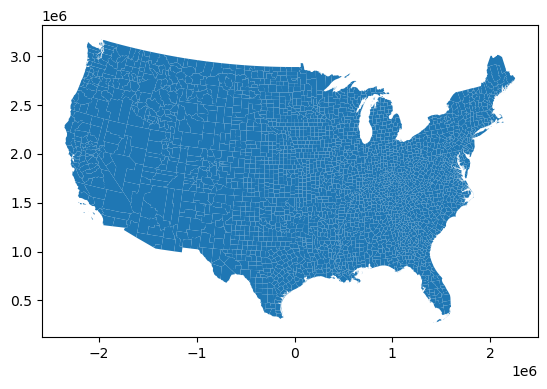

In [8]:
# You can use .plot() method to plot the GeoDataFrame. 
# If there is no 'geometry' column, it will plot a numerical values.
county_gdf.plot()

The code cell below shows how to check the Coordinate Reference System (CRS) of a GeoDataFrame. It is represented based on the EPSG code (https://epsg.io/).

In [9]:
# Checking the Coordinate Reference System (CRS) of the GeoDataFrame
county_gdf.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# 2. Selecting rows (records) based on a condition

GeoPandas provides a method called `loc` to select rows based on a condition. 
The syntax is as shown below. 

```python
gdf.loc[`row condition`, `column condition`] 
```

For example, the code below demonstrates how to select rows based on a condition, selecting only the counties in the State of Alabama. 

```python
county_gdf.loc[county_gdf['StateName'] == 'Alabama']
```

If you leave the column condition empty, it will select all columns. 

In [10]:
# It is possible to compare the value within the Series (i.e., a column) to a list of values or a single value. 
# The result is a boolean Series.
county_gdf['StateName'] == 'Alabama'

0        True
1        True
2        True
3        True
4        True
        ...  
3103    False
3104    False
3105    False
3106    False
3107    False
Name: StateName, Length: 3108, dtype: bool

In [11]:
# .loc method is used to access a group of rows and columns by label(s) or a boolean array.
county_gdf.loc[county_gdf['StateName'] == 'Alabama']

,GEOID,StateCode,StateName,CountyName,geometry
0,01001,01,Alabama,Autauga County,"POLYGON ((891242.238 1081781.177, 891086.081 1..."
1,01003,01,Alabama,Baldwin County,"POLYGON ((773834.264 831250.746, 775614.661 83..."
2,01005,01,Alabama,Barbour County,"POLYGON ((967406.473 1001654.573, 967558.617 1..."
3,01007,01,Alabama,Bibb County,"POLYGON ((845975.782 1144275.950, 845993.624 1..."
4,01009,01,Alabama,Blount County,"POLYGON ((864758.270 1235754.115, 865138.916 1..."
...,...,...,...,...,...
62,01125,01,Alabama,Tuscaloosa County,"POLYGON ((765037.213 1138476.295, 764824.912 1..."
63,01127,01,Alabama,Walker County,"POLYGON ((810200.341 1206643.517, 809896.974 1..."
64,01129,01,Alabama,Washington County,"POLYGON ((762219.720 944174.382, 762224.625 94..."
65,01131,01,Alabama,Wilcox County,"POLYGON ((838520.787 1036515.828, 844616.592 1..."


In [12]:
# You can assign the result to a new variable
alabama_gdf = county_gdf.loc[county_gdf['StateName'] == 'Alabama']
alabama_gdf

,GEOID,StateCode,StateName,CountyName,geometry
0,01001,01,Alabama,Autauga County,"POLYGON ((891242.238 1081781.177, 891086.081 1..."
1,01003,01,Alabama,Baldwin County,"POLYGON ((773834.264 831250.746, 775614.661 83..."
2,01005,01,Alabama,Barbour County,"POLYGON ((967406.473 1001654.573, 967558.617 1..."
3,01007,01,Alabama,Bibb County,"POLYGON ((845975.782 1144275.950, 845993.624 1..."
4,01009,01,Alabama,Blount County,"POLYGON ((864758.270 1235754.115, 865138.916 1..."
...,...,...,...,...,...
62,01125,01,Alabama,Tuscaloosa County,"POLYGON ((765037.213 1138476.295, 764824.912 1..."
63,01127,01,Alabama,Walker County,"POLYGON ((810200.341 1206643.517, 809896.974 1..."
64,01129,01,Alabama,Washington County,"POLYGON ((762219.720 944174.382, 762224.625 94..."
65,01131,01,Alabama,Wilcox County,"POLYGON ((838520.787 1036515.828, 844616.592 1..."


<Axes: >

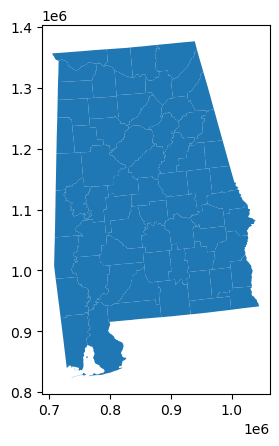

In [13]:
# Again, you can plot the GeoDataFrame using .plot() method
alabama_gdf.plot()

---
### *Exercise*
1. (6 points) The following in the syntax for the `loc` function in Pandas/GeoPandas. Select rows for New York State and assign it to a new variable called `ny_gdf`. <br><br>
Note: Replace 'COLUMN NAME' with the actual column name and 'VALUE' with the actual value indicating New York. 
<br><br>
StateCode: 36, StateName: New York <br>

    ```python
    ny_gdf = county_gdf.loc[county_gdf['COLUMN NAME'] == 'VALUE']
    ```

---

In [14]:
# Your code here
ny_gdf = county_gdf.loc[county_gdf['COLUMN NAME'] == 'VALUE']
ny_gdf

KeyError: 'COLUMN NAME'

In [23]:
""" Test code for the previous function. 
This cell should NOT give any errors when it is run."""

assert ny_gdf['StateCode'].unique() == '36'
assert ny_gdf['StateName'].unique() == 'New York'
assert ny_gdf.shape[0] == 62

print("Success!")

Success!


# 3. Load Excel File with Pandas (GDP data)

In [15]:
# To read a Excel file, you can use `pandas` package and .read_excel() method.
# You can also use .read_csv() method to read a CSV file.
# the output of .read_excel() and .read_csv() method is a DataFrame
gdp_df = pd.read_excel('data/GDP_data_cleaned.xlsx', dtype={'GEOID': str})
gdp_df

,GEOID,GeoName,GDP
0,01001,"Autauga, AL",1722438
1,01003,"Baldwin, AL",8102009
2,01005,"Barbour, AL",731636
3,01007,"Bibb, AL",460018
4,01009,"Blount, AL",907179
...,...,...,...
3075,56037,"Sweetwater, WY",3405807
3076,56039,"Teton, WY",2659859
3077,56041,"Uinta, WY",783682
3078,56043,"Washakie, WY",344531


In [16]:
# Checking the type of the object
type(gdp_df)

pandas.core.frame.DataFrame

In [17]:
# Checking the data types of the columns (object = string, int64 = integer, float64 = float)
gdp_df.dtypes

GEOID      object
GeoName    object
GDP         int64
dtype: object

---
### *Exercise*
2. (6 points) Investigate the data folder to find out the name of an Excel file that contains population data for the United States. <br> 
Then, load the Excel file using the `read_excel` function in Pandas and assign it to a new variable called `pop_df`. <br>

    ```python
    pop_df = pd.read_excel('./data/file_name.xlsx', dtype={'GEOID': str})
    ```

---

In [ ]:
# Your code here

pop_df = pd.read_excel('./data/file_name.xlsx', dtype={'GEOID': str})
pop_df

In [21]:
# Your code here

pop_df = pd.read_excel('./data/population_data_cleaned.xlsx', dtype={'GEOID': str})
pop_df

,GEOID,NAME,Pop
0,01001,"Autauga County, Alabama",55639
1,01003,"Baldwin County, Alabama",218289
2,01005,"Barbour County, Alabama",25026
3,01007,"Bibb County, Alabama",22374
4,01009,"Blount County, Alabama",57755
...,...,...,...
3216,72145,"Vega Baja Municipio, Puerto Rico",51089
3217,72147,"Vieques Municipio, Puerto Rico",8508
3218,72149,"Villalba Municipio, Puerto Rico",21899
3219,72151,"Yabucoa Municipio, Puerto Rico",32867


In [31]:
""" Test code for the previous function. 
This cell should NOT give any errors when it is run."""

assert 'Pop' in pop_df.columns
assert pop_df.shape == (3221, 3)
assert pop_df['GEOID'].dtype == 'object'

print("Success!")

Success!


# 4. Join (Merge) county geometry and GDP data

Currently, `county_gdf` has geometry data and `gdp_df` has GDP data. We need to join (merge) these two datasets to make a choropleth map.

### Join
a join refers to the process of linking two sets of data based on a common attribute or field.

![](https://desktop.arcgis.com/en/arcmap/latest/tools/data-management-toolbox/GUID-C441B51F-B581-4743-A975-3EB04087838C-web.gif)

<br>
Merge (join) method syntax is as shown below. 
    
```python
join_gdf = df1.merge(df2, on='COLUMN NAME')
```

resource: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [31]:
# Checking `count_gdf`
county_gdf

,GEOID,StateCode,StateName,CountyName,geometry
0,01001,01,Alabama,Autauga County,"POLYGON ((891242.238 1081781.177, 891086.081 1..."
1,01003,01,Alabama,Baldwin County,"POLYGON ((773834.264 831250.746, 775614.661 83..."
2,01005,01,Alabama,Barbour County,"POLYGON ((967406.473 1001654.573, 967558.617 1..."
3,01007,01,Alabama,Bibb County,"POLYGON ((845975.782 1144275.950, 845993.624 1..."
4,01009,01,Alabama,Blount County,"POLYGON ((864758.270 1235754.115, 865138.916 1..."
...,...,...,...,...,...
3103,56037,56,Wyoming,Sweetwater County,"POLYGON ((-1160363.896 2136962.350, -1158425.9..."
3104,56039,56,Wyoming,Teton County,"POLYGON ((-1204078.039 2387199.590, -1203753.1..."
3105,56041,56,Wyoming,Uinta County,"POLYGON ((-1202237.750 2156253.483, -1201901.9..."
3106,56043,56,Wyoming,Washakie County,"POLYGON ((-997597.361 2419071.771, -994119.472..."


In [32]:
# Checking `gdp_df`
gdp_df

,GEOID,GeoName,GDP
0,01001,"Autauga, AL",1722438
1,01003,"Baldwin, AL",8102009
2,01005,"Barbour, AL",731636
3,01007,"Bibb, AL",460018
4,01009,"Blount, AL",907179
...,...,...,...
3075,56037,"Sweetwater, WY",3405807
3076,56039,"Teton, WY",2659859
3077,56041,"Uinta, WY",783682
3078,56043,"Washakie, WY",344531


Both `county_gdf` and `gdp_df` have the column of `GEOID`, so that it can be used for the join. 

In [33]:
# It is also recommend to check the data type of the column(s) that you want to merge.
gdp_df.dtypes

GEOID      object
GeoName    object
GDP         int64
dtype: object

In [34]:
county_gdf.dtypes

GEOID           object
StateCode       object
StateName       object
CountyName      object
geometry      geometry
dtype: object

Merge (join) method syntax is `df1.merge(df2, on='COLUMN NAME')`. <br>

resource: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [35]:
gdp_gdf = county_gdf.merge(gdp_df, on='GEOID', how='left')
gdp_gdf

,GEOID,StateCode,StateName,CountyName,geometry,GeoName,GDP
0,01001,01,Alabama,Autauga County,"POLYGON ((891242.238 1081781.177, 891086.081 1...","Autauga, AL",1722438.0
1,01003,01,Alabama,Baldwin County,"POLYGON ((773834.264 831250.746, 775614.661 83...","Baldwin, AL",8102009.0
2,01005,01,Alabama,Barbour County,"POLYGON ((967406.473 1001654.573, 967558.617 1...","Barbour, AL",731636.0
3,01007,01,Alabama,Bibb County,"POLYGON ((845975.782 1144275.950, 845993.624 1...","Bibb, AL",460018.0
4,01009,01,Alabama,Blount County,"POLYGON ((864758.270 1235754.115, 865138.916 1...","Blount, AL",907179.0
...,...,...,...,...,...,...,...
3103,56037,56,Wyoming,Sweetwater County,"POLYGON ((-1160363.896 2136962.350, -1158425.9...","Sweetwater, WY",3405807.0
3104,56039,56,Wyoming,Teton County,"POLYGON ((-1204078.039 2387199.590, -1203753.1...","Teton, WY",2659859.0
3105,56041,56,Wyoming,Uinta County,"POLYGON ((-1202237.750 2156253.483, -1201901.9...","Uinta, WY",783682.0
3106,56043,56,Wyoming,Washakie County,"POLYGON ((-997597.361 2419071.771, -994119.472...","Washakie, WY",344531.0


In [36]:
# Since we did the left-join, there are some missing values in the GDP column.
# The following code is to select the rows that have missing values (NULL/NaN value) in the GDP column.
gdp_gdf.loc[gdp_gdf['GDP'].isna()]

,GEOID,StateCode,StateName,CountyName,geometry,GeoName,GDP
2787,51003,51,Virginia,Albemarle County,"POLYGON ((1522916.404 1790306.366, 1519971.702...",NaN,NaN
2788,51005,51,Virginia,Alleghany County,"POLYGON ((1399716.864 1769436.536, 1403857.346...",NaN,NaN
2793,51015,51,Virginia,Augusta County,"POLYGON ((1466992.930 1784604.107, 1466779.095...",NaN,NaN
2801,51031,51,Virginia,Campbell County,"POLYGON ((1465561.612 1694755.060, 1465313.715...",NaN,NaN
2803,51035,51,Virginia,Carroll County,"POLYGON ((1356835.196 1617728.206, 1357042.507...",NaN,NaN
2812,51053,51,Virginia,Dinwiddie County,"POLYGON ((1628344.741 1717134.417, 1628571.640...",NaN,NaN
2814,51059,51,Virginia,Fairfax County,"MULTIPOLYGON (((1594757.865 1899706.005, 15947...",NaN,NaN
2819,51069,51,Virginia,Frederick County,"POLYGON ((1505687.768 1922128.263, 1505154.282...",NaN,NaN
2825,51081,51,Virginia,Greensville County,"POLYGON ((1608546.510 1658667.391, 1609778.514...",NaN,NaN
2829,51089,51,Virginia,Henry County,"POLYGON ((1419492.539 1619872.456, 1418339.220...",NaN,NaN


In [37]:
# We can simply replace the NaN values with 0, using .fillna() method.
gdp_gdf['GDP'] = gdp_gdf['GDP'].fillna(0)

In [38]:
# NaN values are gone!
gdp_gdf.loc[gdp_gdf['GDP'].isna()]

,GEOID,StateCode,StateName,CountyName,geometry,GeoName,GDP


In [39]:
gdp_gdf

,GEOID,StateCode,StateName,CountyName,geometry,GeoName,GDP
0,01001,01,Alabama,Autauga County,"POLYGON ((891242.238 1081781.177, 891086.081 1...","Autauga, AL",1722438.0
1,01003,01,Alabama,Baldwin County,"POLYGON ((773834.264 831250.746, 775614.661 83...","Baldwin, AL",8102009.0
2,01005,01,Alabama,Barbour County,"POLYGON ((967406.473 1001654.573, 967558.617 1...","Barbour, AL",731636.0
3,01007,01,Alabama,Bibb County,"POLYGON ((845975.782 1144275.950, 845993.624 1...","Bibb, AL",460018.0
4,01009,01,Alabama,Blount County,"POLYGON ((864758.270 1235754.115, 865138.916 1...","Blount, AL",907179.0
...,...,...,...,...,...,...,...
3103,56037,56,Wyoming,Sweetwater County,"POLYGON ((-1160363.896 2136962.350, -1158425.9...","Sweetwater, WY",3405807.0
3104,56039,56,Wyoming,Teton County,"POLYGON ((-1204078.039 2387199.590, -1203753.1...","Teton, WY",2659859.0
3105,56041,56,Wyoming,Uinta County,"POLYGON ((-1202237.750 2156253.483, -1201901.9...","Uinta, WY",783682.0
3106,56043,56,Wyoming,Washakie County,"POLYGON ((-997597.361 2419071.771, -994119.472...","Washakie, WY",344531.0


---
### *Exercise*
3. (6 points) Join `county_gdf` and `pop_df` using the `.merge()` method. You want you merge `pop_df` into `county_gdf` based on the `GEOID` column, and assigned the result into a new GeoDataFrame with the name of `pop_gdf`. <br><br>
resource: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html


Merge method syntax is as shown below. 

```python
    pop_gdf = df1.merge(df2, on='COLUMN NAME', how='left')
```

Expected results are as follows: <br>
<img src="./images/q3.jpg">

---



In [ ]:
# Your code here

pop_gdf = df1.merge(df2, on='COLUMN NAME', how='left')
pop_gdf

In [33]:
pop_gdf = county_gdf.merge(pop_df, on='GEOID', how='left')
pop_gdf

,GEOID,StateCode,StateName,CountyName,geometry,NAME,Pop
0,01001,01,Alabama,Autauga County,"POLYGON ((891242.238 1081781.177, 891086.081 1...","Autauga County, Alabama",55639
1,01003,01,Alabama,Baldwin County,"POLYGON ((773834.264 831250.746, 775614.661 83...","Baldwin County, Alabama",218289
2,01005,01,Alabama,Barbour County,"POLYGON ((967406.473 1001654.573, 967558.617 1...","Barbour County, Alabama",25026
3,01007,01,Alabama,Bibb County,"POLYGON ((845975.782 1144275.950, 845993.624 1...","Bibb County, Alabama",22374
4,01009,01,Alabama,Blount County,"POLYGON ((864758.270 1235754.115, 865138.916 1...","Blount County, Alabama",57755
...,...,...,...,...,...,...,...
3103,56037,56,Wyoming,Sweetwater County,"POLYGON ((-1160363.896 2136962.350, -1158425.9...","Sweetwater County, Wyoming",43352
3104,56039,56,Wyoming,Teton County,"POLYGON ((-1204078.039 2387199.590, -1203753.1...","Teton County, Wyoming",23356
3105,56041,56,Wyoming,Uinta County,"POLYGON ((-1202237.750 2156253.483, -1201901.9...","Uinta County, Wyoming",20374
3106,56043,56,Wyoming,Washakie County,"POLYGON ((-997597.361 2419071.771, -994119.472...","Washakie County, Wyoming",7933


In [34]:
""" Test code for the previous function. 
This cell should NOT give any errors when it is run."""

assert 'GEOID' in pop_gdf.columns.to_list()
assert 'geometry' in pop_gdf.columns.to_list()
assert 'Pop' in pop_gdf.columns.to_list()
assert pop_gdf.shape == (3108, 7)

print("Success!")

Success!


# 5. Make a choropleth map of GDP data 

GeoDataFrame has a built-in function called `plot` to make a choropleth map. <br>

Syntax: `GeoDataFrame.plot(column='COLUMN NAME', cmap='COLOR MAP NAME', legend=True, figsize=(WIDTH, HEIGHT))`

<Axes: >

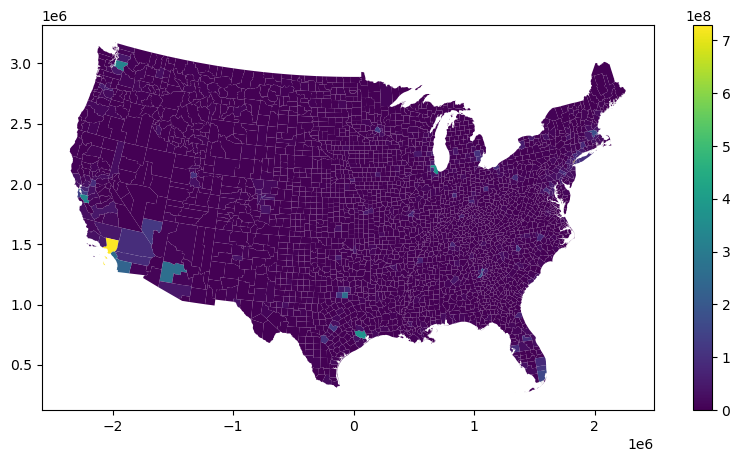

In [41]:
gdp_gdf.plot(column='GDP', figsize=(10,5), legend=True)

`camp` attribute is used to change the color map. <br>
various color maps: https://matplotlib.org/stable/users/explain/colors/colormaps.html

<Axes: >

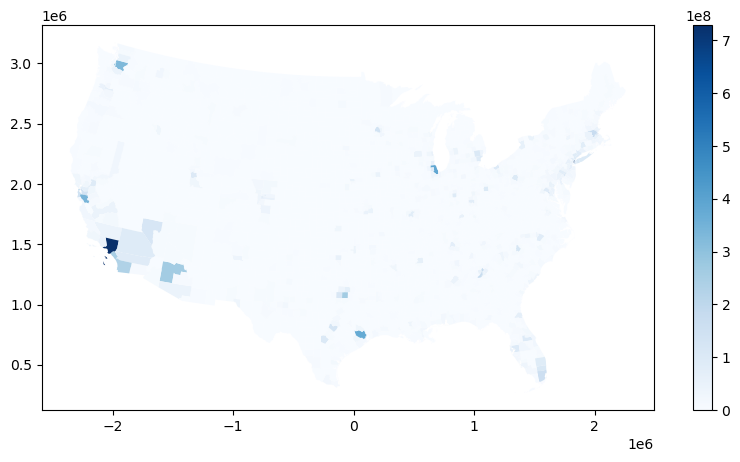

In [42]:
gdp_gdf.plot(column='GDP', cmap='Blues', figsize=(10,5), legend=True)

`scheme` attribute is used to change the classification method. <br>
various classification methods: https://pysal.org/mapclassify/api.html

<Axes: >

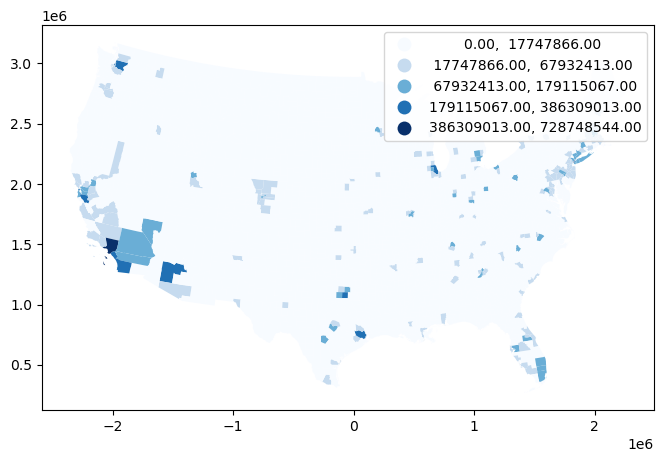

In [43]:
gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,5), legend=True)

<Axes: >

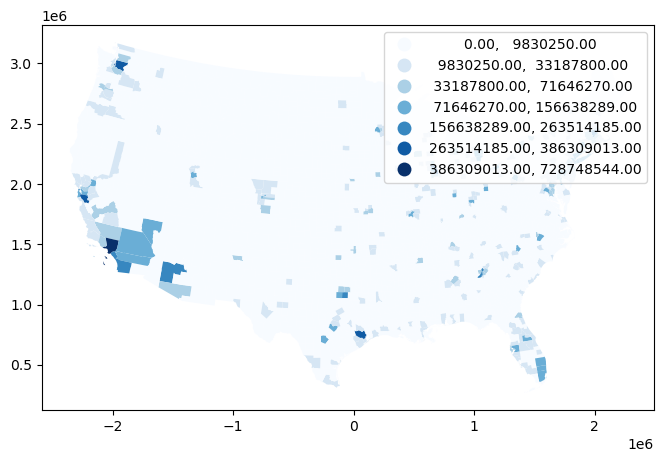

In [44]:
gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,5), legend=True, k=7)

The current map is missing the state boundary, making the interpretation of the map difficult. <br>
In Python, it is also possible to overlay multiple layers on a map. But, just to keep the lab simple, the following code shows the examples of overlaying the state boundary and the choropleth map of GDP. <br>


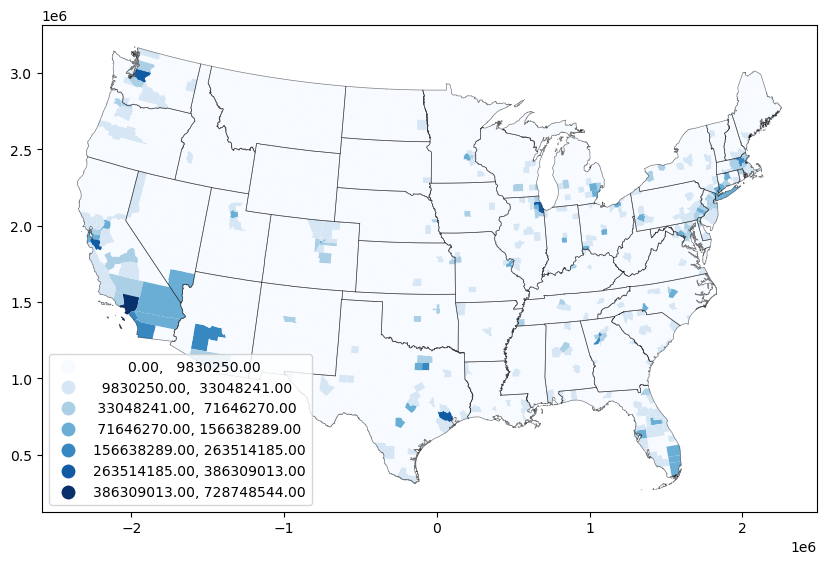

In [50]:
# Get another layer of the state boundaries
state_gdf = gpd.read_file('./data/states.shp')

fig, ax = plt.subplots(figsize=(10,10))

gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,10), legend=True, k=7, ax=ax, legend_kwds={'loc': 'lower left'})
state_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)
plt.show()

---
### *Exercise*
4. (7 points) Create a choropleth map of population for the conterminous United States. <br>
    - Consult using the code below and fill in a proper information for the attributes below <br>
    - `column`: column with the population information <br>
    - `cmap` : Green color map (resource: https://matplotlib.org/stable/users/explain/colors/colormaps.html) <br>
    - `scheme`: Natural Break classification method <br>
    - `legend`: True (to show the legend) <br>
    - `k`: 7 (number of classes) <br>

    ```python
    fig, ax = plt.subplots(figsize=(10,5)) # Define the canvas for the map

    # Plot the population data
    pop_gdf.plot(column=`COLUMN NAME`, cmap=`COLOR MAP NAME`, scheme=`CLASSIFICATION METHOD`, legend=True, k=`NUMBER OF CLASSES`, ax=ax)

    # Plot the state boundary
    state_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)

    # Show the map
    plt.show()
    ```

Expected results are as follows: <br>
<img src="./images/q4.jpg">

---


In [ ]:
# Your code here
fig, ax = plt.subplots(figsize=(10,5)) # Define the canvas for the map

# Plot the population data
pop_gdf.plot(column=`COLUMN NAME`, cmap=`COLOR MAP NAME`, scheme=`CLASSIFICATION METHOD`, legend=True, k=`NUMBER OF CLASSES`, ax=ax)

# Plot the state boundary
state_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)

# Show the map
plt.show()

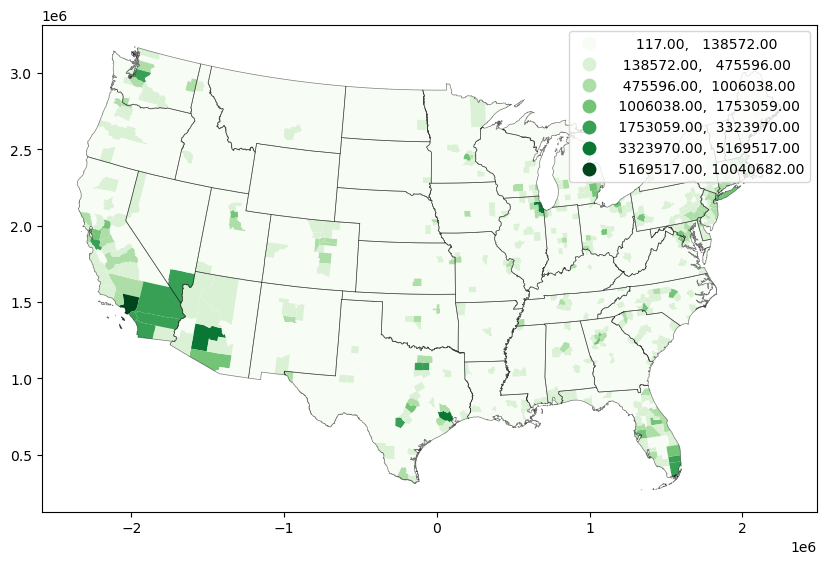

In [35]:
# Your code here
fig, ax = plt.subplots(figsize=(10,10)) # Define the canvas for the map

# Plot the population data
pop_gdf.plot(column='Pop', cmap='Greens', scheme='NaturalBreaks', legend=True, k=7, ax=ax)

# Plot the state boundary
state_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)

# Show the map
plt.show()

# Summary

the following is the backbone of the code for the analysis. <br>

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


# Load County Shapefile
county_gdf = gpd.read_file('./data/county_cleaned.shp')

# Load GDP Data
gdp_df = pd.read_excel('./data/GDP_data_cleaned.xlsx', dtype={'GEOID': str})

# Merge (Join) GDP Data with County Shapefile
gdp_gdf = county_gdf.merge(gdp_df, on='GEOID', how='left')

# Visualize GDP Data
# Create an empty figure and axis (canvas)
fig, ax = plt.subplots(1, 1, figsize=(10,10))  

gdp_gdf.plot(column='GDP',            # Column to visualize
             cmap='Blues',            # Color map
             scheme='NaturalBreaks',  # Classification scheme
             legend=True,             # Show legend
             legend_kwds={'loc': 'lower left', 'fontsize': 8.1}, # Legend settings
             k=7,                     # Number of classes
             ax=ax                    # Axis to plot on
             )

# Load state shapefile (Plotting purposes)
state_gdf = gpd.read_file('./data/states.shp') 

# Add state boundaries
state_gdf.boundary.plot(ax=ax, color='grey', linewidth=0.5) 

# Set title
ax.set_title('County-level Gross Domestic Product (GDP)', fontsize=16) 

# Remove axis
ax.axis('off') 

plt.show() # Show the plot


# 6. Correlation Analysis between Population and GDP

Pearson's r is a statistical test that measures the strength and direction of the relationship between two continuous variables. <br><br> It ranges from -1 to +1. A correlation of -1 indicates a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no correlation.

![](https://www.biologyforlife.com/uploads/2/2/3/9/22392738/correlation_1.jpg?688)

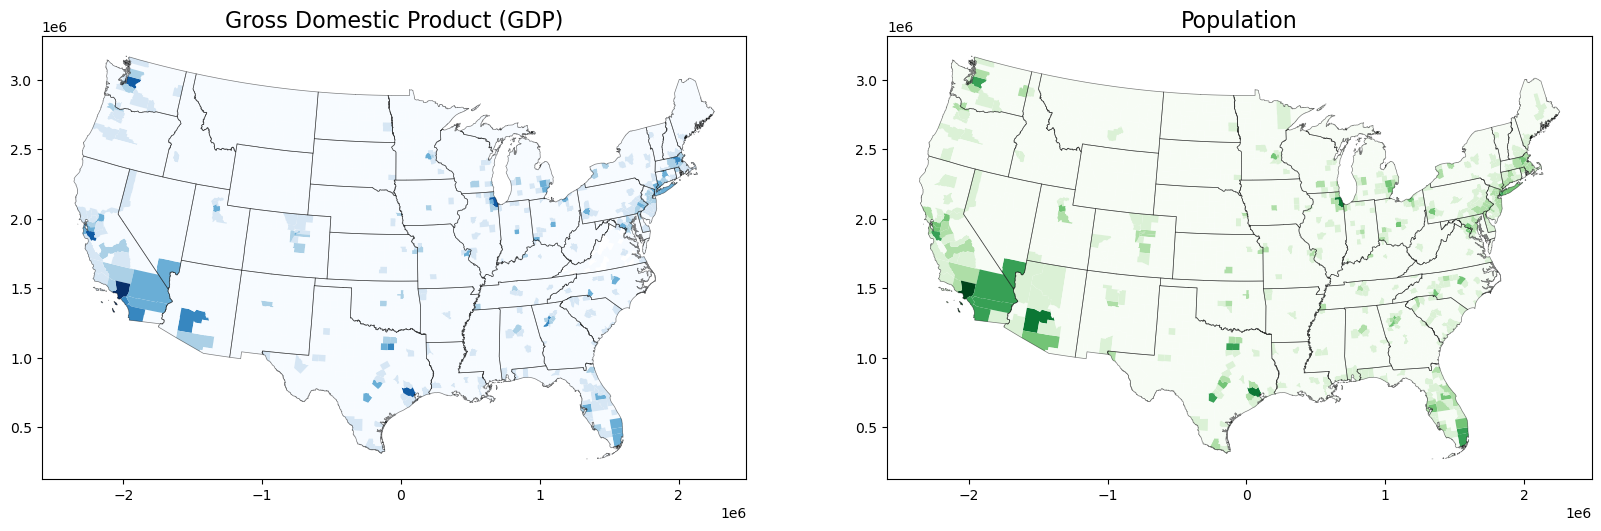

In [49]:
# Visually comparing GDP and Population Data 
fig, axes = plt.subplots(1, 2, figsize=(20,10))

gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', k=7, ax=axes[0])
state_gdf.boundary.plot(ax=axes[0], color='black', linewidth=0.5, alpha=0.5)
axes[0].set_title('Gross Domestic Product (GDP)', fontsize=16)

pop_gdf.plot(column='Pop', cmap='Greens', scheme='NaturalBreaks',  k=7, ax=axes[1])
state_gdf.boundary.plot(ax=axes[1], color='black', linewidth=0.5, alpha=0.5)
axes[1].set_title('Population', fontsize=16)
plt.show()

In [46]:
import scipy

# Combining GDP and Population Data into a single DataFrame
corr_df = gdp_gdf[['GEOID', 'GDP']].copy()
corr_df = corr_df.merge(pop_gdf[['GEOID', 'Pop']], on='GEOID', how='left')
corr_df = corr_df.dropna()
corr_df

,GEOID,GDP,Pop
0,01001,1722438.0,55639
1,01003,8102009.0,218289
2,01005,731636.0,25026
3,01007,460018.0,22374
4,01009,907179.0,57755
...,...,...,...
3103,56037,3405807.0,43352
3104,56039,2659859.0,23356
3105,56041,783682.0,20374
3106,56043,344531.0,7933


In [54]:
# Conducting Pearson Correlation
corr_result = scipy.stats.pearsonr(corr_df['GDP'], corr_df['Pop'])
corr_result

PearsonRResult(statistic=0.8755782732603061, pvalue=0.0)

/opt/homebrew/anaconda3/envs/sa/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


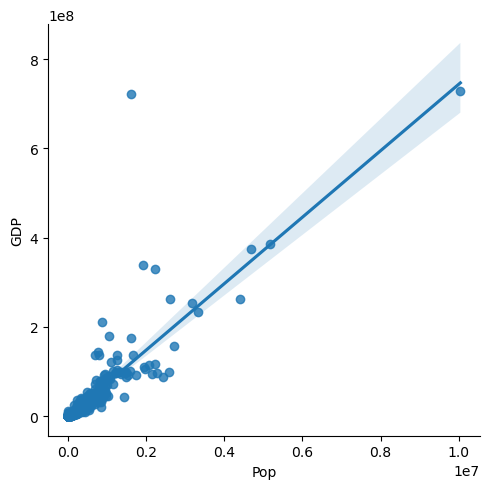

In [71]:
import seaborn as sns
sns.lmplot(data=corr_df, x='Pop', y='GDP')
plt.show()

# Done